<a href="https://colab.research.google.com/github/rachana2522/Iris-Flowers-Classification/blob/main/iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Flowers Classification

Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                names=["sepal_length_in_cm","sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm","class"])

In [3]:
df.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()


sepal_length_in_cm    0
sepal_width_in_cm     0
petal_length_in_cm    0
petal_width_in_cm     0
class                 0
dtype: int64

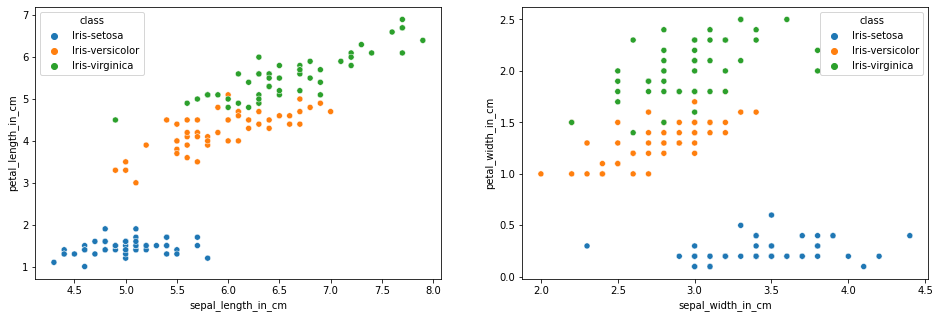

In [6]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='sepal_length_in_cm',y='petal_length_in_cm',data=df,hue='class',ax=ax1)
sns.scatterplot(x='sepal_width_in_cm',y='petal_width_in_cm',data=df,hue='class',ax=ax2)

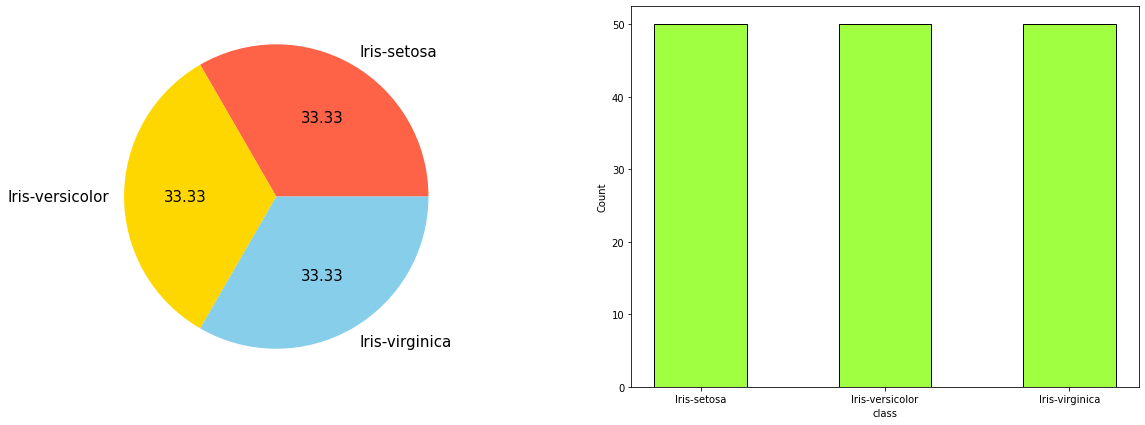

In [7]:

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,7))
df.groupby('class').size().plot(kind='pie',autopct='%.2f',ax=ax1,textprops={'fontsize':15,'color':'black'},colors=['tomato','gold','skyblue'])
plt.axes(ax1).set_ylabel('')
sns.histplot(df['class'],shrink=0.5,ax=ax2,color='chartreuse')

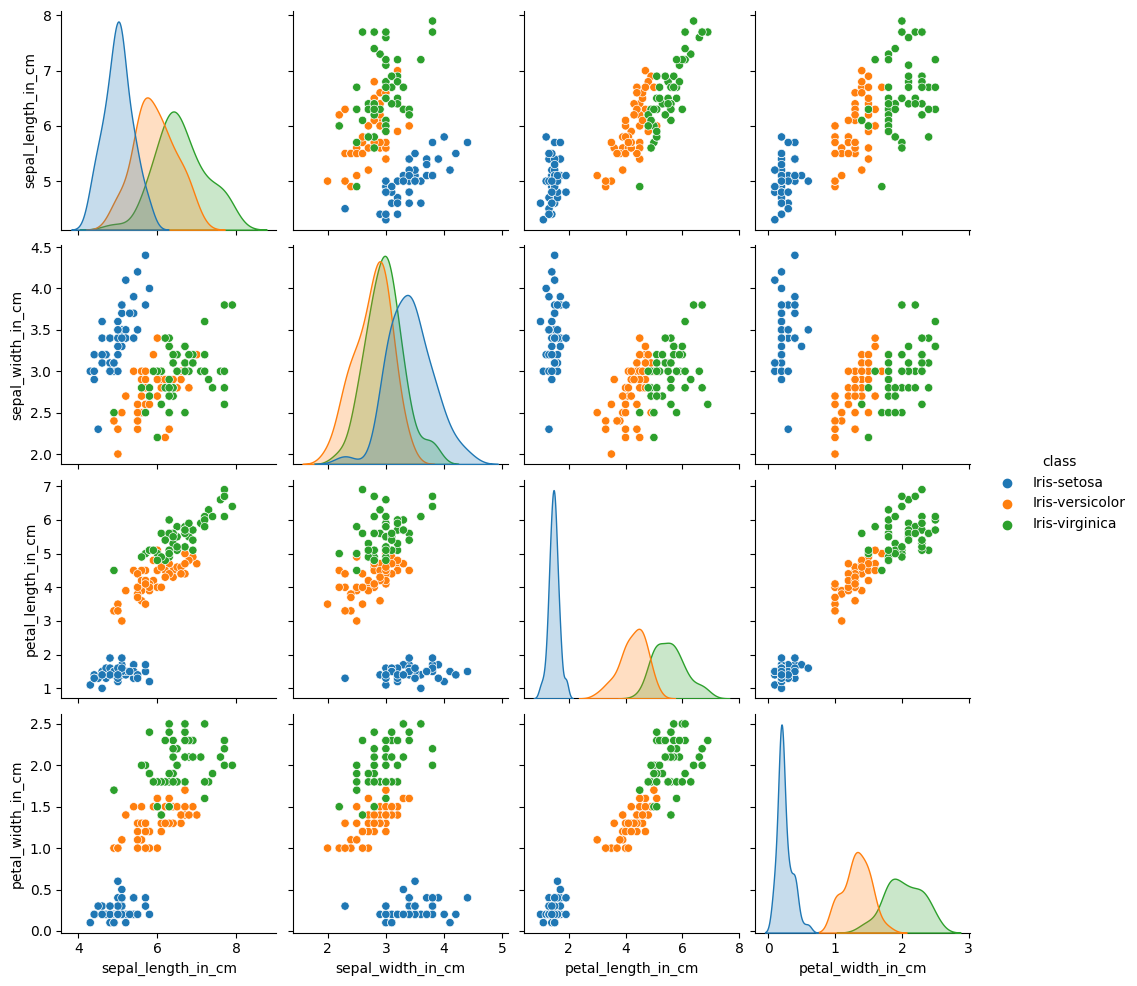

In [8]:
plt.style.use("default")
sns.pairplot(df,hue="class")

In [9]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [10]:
df.replace({'class':{'Iris-versicolor':1 , 'Iris-setosa':2 , 'Iris-virginica':3 }},inplace=True)

Separating features and target

In [11]:
x = df.drop(columns=['class'])
y = df['class']

In [12]:
print(x)
print(y)

     sepal_length_in_cm  ...  petal_width_in_cm
0                   5.1  ...                0.2
1                   4.9  ...                0.2
2                   4.7  ...                0.2
3                   4.6  ...                0.2
4                   5.0  ...                0.2
..                  ...  ...                ...
145                 6.7  ...                2.3
146                 6.3  ...                1.9
147                 6.5  ...                2.0
148                 6.2  ...                2.3
149                 5.9  ...                1.8

[150 rows x 4 columns]
0      2
1      2
2      2
3      2
4      2
      ..
145    3
146    3
147    3
148    3
149    3
Name: class, Length: 150, dtype: int64


In [13]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=2)

In [14]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)



Training model [ KNN Algorithm ]

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [16]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
x_train_prediction = model.predict(x_train)

In [18]:
print(x_train_prediction)

[3 2 1 3 1 2 3 1 1 3 1 1 3 1 2 3 2 1 2 2 2 1 3 3 2 3 3 3 1 2 2 3 1 1 3 3 1
 2 1 2 3 1 1 2 1 1 1 3 2 1 2 1 3 2 1 2 2 2 3 3 2 2 3 3 1 3 1 1 3 2 3 3 3 2
 3 2 2 1 3 1 3 1 1 3 1 1 1 3 3 3 3 2 1 1 1 1 3 1 2 2 3 1 3 2 3 2 3 3 2 1 2
 3 1 2 3 1 2 2 3 2]



Accuracy Of Predicting The Training Data

In [19]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
cm=confusion_matrix(y_train,x_train_prediction)
print("KNeighborsClassifier : ",training_data_accuracy)
print("\nConfusion Matrix : \n",cm)

KNeighborsClassifier :  0.9583333333333334

Confusion Matrix : 
 [[39  0  3]
 [ 0 36  0]
 [ 2  0 40]]


Accuracy Of predicting The Testing Data

In [20]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
cmt=confusion_matrix(y_test,x_test_prediction)
print("KNeighborsClassifier : ",test_data_accuracy)
print("\nConfusion Matrix : \n",cmt)

KNeighborsClassifier :  1.0

Confusion Matrix : 
 [[ 8  0  0]
 [ 0 14  0]
 [ 0  0  8]]


Testing of model Using Pickle

THANK YOU